### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

Hi I am Shaunak Kunde. I have undertaken this capstone project in Data Analytics assigned by Google and provided by Coursera. Here, let us understand the case. The HR Department at Salifort Motors is a major stakeholder. My goals in this project is to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. I used the Kaggle dataset HR Analytics Job prediction https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv Right now no ethical issues. My initial observations (as found from kaggle analytics) are....very few got promoted, maximum people spend around three years in this company. Many employees handle around 4 projects each. but satisfaction level is generally on a higher side. 

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
#Import packages
import pandas as pd

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe_shaunak
df0 = pd.read_csv("HR_capstone_dataset.csv")
# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
# Gather basic information about the data_shaunak
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Gather descriptive statistics about the data

In [7]:
# Gather descriptive statistics about the data_shaunak
df0_cleaned = df0.dropna()
df0_cleaned.describe()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [8]:
# Display all column names_shaunak
print(df0.columns.tolist())


['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']


In [9]:
# Rename columns as needed_shaunak
df0.columns = df0.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
df0.rename(columns={
    'employee_number': 'emp_num',
    'years_at_company': 'tenure',
    'job_role': 'role',
    'monthly_income': 'income'
}, inplace=True)

# Display all column names after the update
print(df0.columns.tolist())

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'work_accident', 'left', 'promotion_last_5years', 'department', 'salary']


### Check missing values

Check for any missing values in the data.

In [10]:
# Check for missing values_shaunak
print(df0.isnull().sum())


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64


### Check duplicates

Check for any duplicate entries in the data.

In [11]:
# Check for duplicates_shaunak
duplicate_rows = df0[df0.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 3008


In [12]:
# Inspect some rows containing duplicates as needed_shaunak
print(duplicate_rows.head())


      satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_montly_hours  time_spend_company  work_accident  left  \
396                    139                   3              0     1   
866                    128                   3              0     1   
1317                   127                   3              0     1   
1368                   132                   3              0     1   
1461                   142                   3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368  

In [14]:
# Drop duplicates and save resulting dataframe in a new variable as needed_shaunak
df_cleaned = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
df_cleaned.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

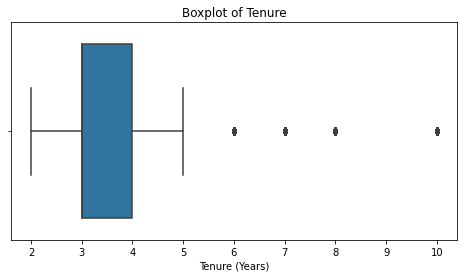

In [16]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers_shaunak
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_cleaned['time_spend_company'])
plt.title('Boxplot of Tenure')
plt.xlabel('Tenure (Years)')
plt.show()



In [18]:
# Determine the number of rows containing outliers_shaunak
Q1 = df_cleaned['time_spend_company'].quantile(0.25)
Q3 = df_cleaned['time_spend_company'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_cleaned[(df_cleaned['time_spend_company'] < lower_bound) | (df_cleaned['time_spend_company'] > upper_bound)]
print(f"Number of outlier rows in 'tenure': {outliers.shape[0]}")


Number of outlier rows in 'tenure': 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Relationships:-Lower satisfaction, high workload, and low salary are strongly linked to employee attrition.
Distributions are moxed, some are skewd binomial some are normal, also there are bimodal or two peaks.
I transformed by checking null, removing nulls, renaming columns, removed duplicates and outliers to improve clarity and model quality. EDA helped understand data structure, detect patterns, and prepare for accurate modeling.
I used pandas and kaggle till now. And the python notes prepared in my first semester of masters.
As far as ethics is concerned, ensure data privacy so that PII is not revealed. Expect fairness and transparency.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [27]:
# Get numbers of people who left vs.stayed_shaunak
left_counts = df_cleaned['left'].value_counts()
print(left_counts)

# Get percentages of people who left vs. stayed
left_percentages = df_cleaned['left'].value_counts(normalize=True) * 100
print(left_percentages)


0    10000
1     1991
Name: left, dtype: int64
0    83.39588
1    16.60412
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

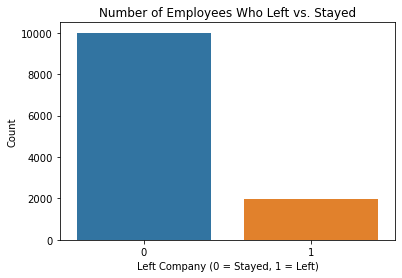

In [30]:
# Create a plot as needed_shaunak
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='left', data=df_cleaned)
plt.title('Number of Employees Who Left vs. Stayed')
plt.xlabel('Left Company (0 = Stayed, 1 = Left)')
plt.ylabel('Count')
plt.show()


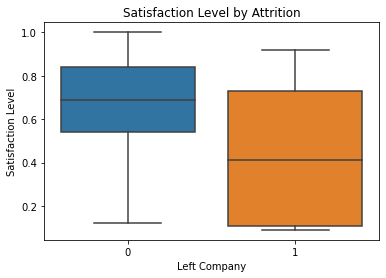

In [35]:
# Create a plot as needed
sns.boxplot(x='left', y='satisfaction_level', data=df_cleaned)
plt.title('Satisfaction Level by Attrition')
plt.xlabel('Left Company')
plt.ylabel('Satisfaction Level')
plt.show()


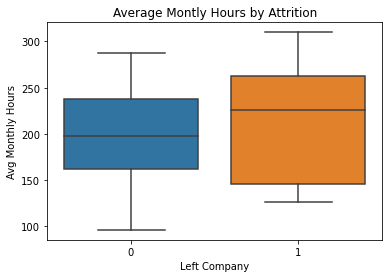

In [36]:
# Create a plot as needed
sns.boxplot(x='left', y='average_montly_hours', data=df_cleaned)
plt.title('Average Montly Hours by Attrition')
plt.xlabel('Left Company')
plt.ylabel('Avg Monthly Hours')
plt.show()


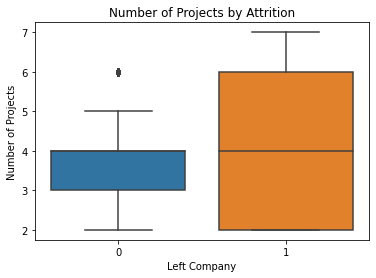

In [39]:
# Create a plot as needed
sns.boxplot(x='left', y='number_project', data=df_cleaned)
plt.title('Number of Projects by Attrition')
plt.xlabel('Left Company')
plt.ylabel('Number of Projects')
plt.show()


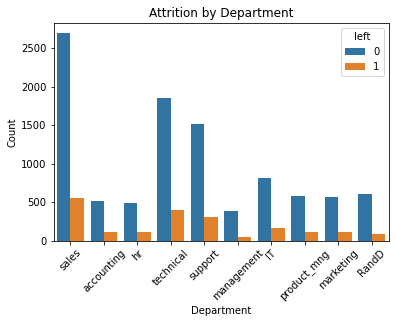

In [40]:
# Create a plot as needed_shaunak
sns.countplot(x='department', hue='left', data=df_cleaned)
plt.xticks(rotation=45)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()


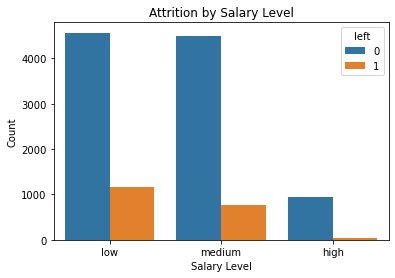

In [42]:
# Create a plot as needed
sns.countplot(x='salary', hue='left', data=df_cleaned, order=['low', 'medium', 'high'])
plt.title('Attrition by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.show()


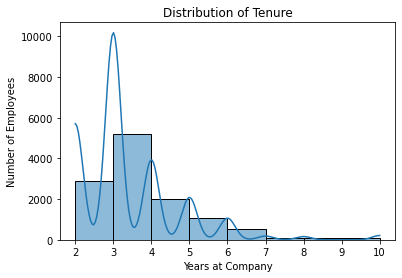

In [44]:
#_shaunak_Create a plot as needed
sns.histplot(df_cleaned['time_spend_company'], bins=8, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Years at Company')
plt.ylabel('Number of Employees')
plt.show()


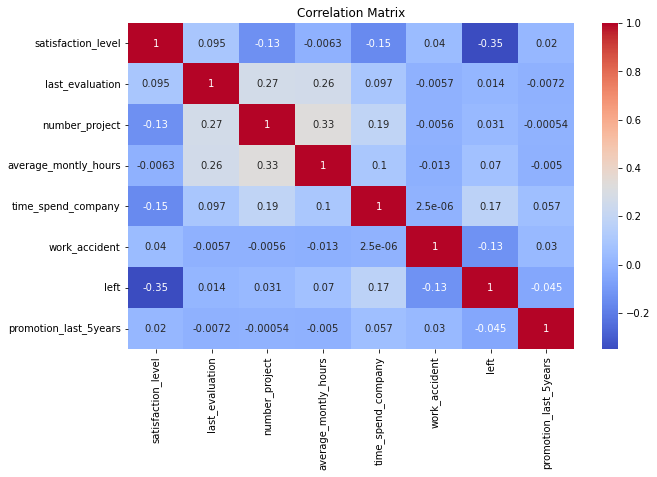

In [46]:
# Create a plot as needed
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Insights

What insights can you gather from the plots you created to visualize the data? 
strong correlation between satisfaction level and salary. Generally leave after 3 years. Low and medium salary employees leave more. Highest attrition in sales, tech and support department. Nearly 2000 employees out of nearly 12000 left in last 5 years.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [56]:
#_shaunak_machine_learning_holdout_methood_for_train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Encode categorical features
df_model = df_cleaned.copy()
df_model['salary'] = LabelEncoder().fit_transform(df_model['salary'])
df_model['department'] = LabelEncoder().fit_transform(df_model['department'])

# Define features and target
X = df_model.drop('left', axis=1)
y = df_model['left']

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

import statsmodels.api as sm
X_const = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_const)
result = logit_model.fit()
print(result.summary())

# Predict and evaluate
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

y_pred = log_model.predict(X_test)
y_proba = log_model.predict_proba(X_test)[:,1]


Optimization terminated successfully.
         Current function value: 0.369394
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                 9592
Model:                          Logit   Df Residuals:                     9582
Method:                           MLE   Df Model:                            9
Date:                Tue, 27 May 2025   Pseudo R-squ.:                  0.1775
Time:                        11:46:46   Log-Likelihood:                -3543.2
converged:                       True   LL-Null:                       -4307.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.7154      0.198     -3.608      0.000      -1.104      -0.

Accuracy: 0.8345
Precision: 0.5135
Recall: 0.1895
F1 Score: 0.2769
ROC AUC: 0.8312
Confusion Matrix:
 [[1926   72]
 [ 325   76]]


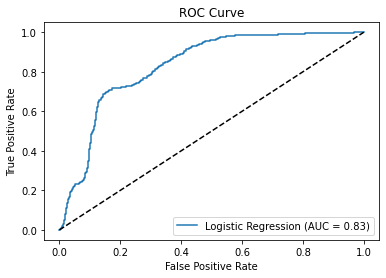

In [57]:
#_shaunak_machine_learning_classification__final_result
print("Accuracy:", format(accuracy_score(y_test, y_pred), '.4g'))
print("Precision:", format(precision_score(y_test, y_pred), '.4g'))
print("Recall:", format(recall_score(y_test, y_pred), '.4g'))
print("F1 Score:", format(f1_score(y_test, y_pred), '.4g'))
print("ROC AUC:", format(roc_auc_score(y_test, y_proba), '.4g'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#_shaunak_machine_learning_roc_plot
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Key insight is that satisfaction level is the strongest negative predictor of attrition (high satisfaction → low attrition).

The model performs well on predicting those who stayed (precision: 86%), but poorly on those who left (recall: 19%).
Work accidents and promotions significantly reduce attrition risk, while long tenure and high hours increase it.
Next Step: Consider oversampling techniques (e.g., SMOTE) or switching to ensemble models (e.g., Random Forest) to improve recall.
Recommend to managers to focus on retention strategies for high-risk groups identified by the model, especially in sales and technical.
Model Improvement you can try Random Forest, XGBoost if they provide enhanced accuracy.
Further Questions:What factors most influence promotion and job satisfaction across departments?
Resources Used: Scikit-learn, Pandas, Seaborn, Kaggle so far and the AI tools to correct my syntax errors.
Ethical Considerations are fairness, avoiding biasedness and privacy issues for employees.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Accuracy: 0.8345143809920801
Precision: 0.5135135135135135
Recall: 0.18952618453865336
F1 Score: 0.2768670309653916
ROC AUC: 0.8312115107626331
Confusion Matrix:
 [[1926   72]
 [ 325   76]]

### Conclusion, Recommendations, Next Steps

The logistic regression model that I used identified key drivers of employee attrition, with satisfaction level being the most significant factor reducing turnover risk; however, the model shows limitations in accurately predicting all employees who leave, indicating room for improvement. Recommendation is to improve employee engagement and workload management. Strengthen promotion policy to retain talent. Target specific departments as mentioned above. Implement early warning system and proactive approach. Update regularly. Next step for a data scientist here like me, could be to use any enhanced model to address class imbalance issues. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.